In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scy
from scipy import integrate
from scipy.integrate import solve_ivp

# Punto 1

$\Sigma F_{y}= N-mgcos 30 = 0\\
\Sigma F_{x}= -f_{l} + mgsen30 = - \gamma ||v^{2}|| +mg sen 30= ma$

Text(0, 0.5, 'Masa')

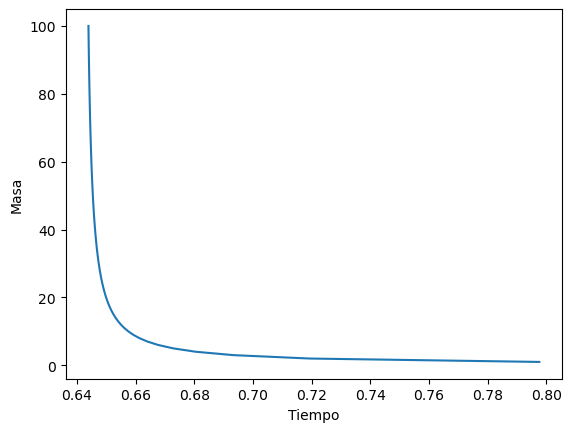

In [6]:
def c_ix(t,x,g,r,m):
    g=9.81
    y,v = x
    return np.array([v,(r*abs(v**2)+m*g*np.sin(30))/m])

def detener(t,x,g,r,m):
    y,v=x
    return y

detener.terminal =True
detener.direction= -1

m =np.linspace(1,100,100)
y0 = np.array([2.,0.])
ts= []

for i in m:
    sol = solve_ivp(c_ix,t_span=(0,10),y0=y0,args=[9.8,0.7,i],max_step=0.01,events=detener,method="Radau")
    ts.append(sol.t[-1])


plt.plot(ts,m)
plt.xlabel("Tiempo")
plt.ylabel("Masa")



# Punto 2

Parte 1

In [9]:
u= 39.4234021
e= 0.20563069
a= 0.38709893
Alpha= 1.09778201e-8


def simu_10b(t,R, u, Alpha):
    x,y,vx,vy = R
    r_vector=np.array([x,y])
    r=np.linalg.norm(r_vector)
    r_g = r_vector/r
    a_vector =-(u/r**2)*(1+Alpha/r**2)*r_g

    return np.array([vx,vy,a_vector[0],a_vector[1] ])


R_0= [a*(1+e),0,0,np.sqrt((u/a)*(1-e)/(1+e))]
t_span=(0,10)


sol = solve_ivp(simu_10b,t_span=t_span,y0=R_0,args=[u,Alpha],max_step=1e-3,method="RK45",dense_output=True)

t_dense = np.linspace(t_span[0],t_span[1],10000)
x_dense, y_dense,vx_dense,vy_dense = sol.sol(t_dense)

Text(0, 0.5, 'Distancia')

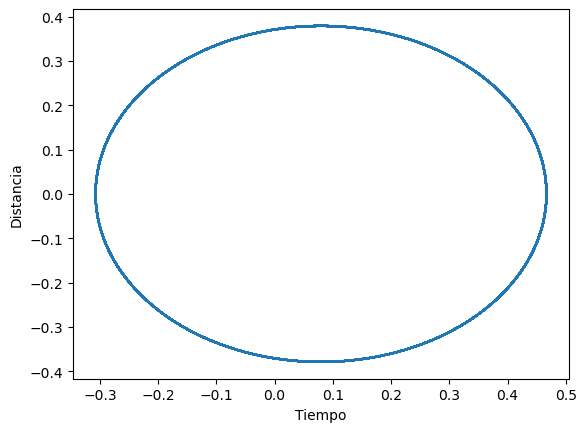

In [10]:
plt.plot(x_dense,y_dense)
plt.xlabel("Tiempo")
plt.ylabel("Distancia")

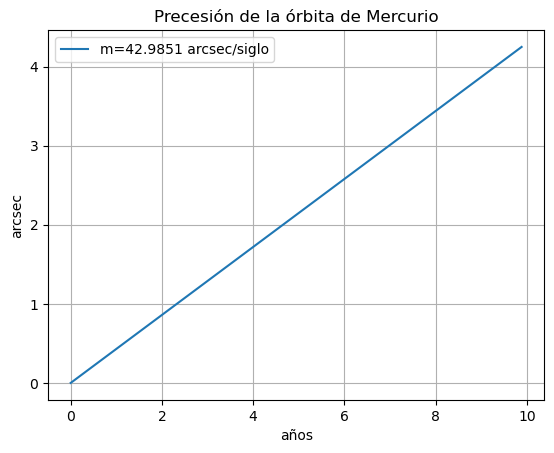

In [16]:
def cerca (t,R, u, Alpha):
    x,y,vx,vy = R
    return np.array([x*vx+y*vy])

cerca.direction= 0
t_span=(0.,10)

sol_p = solve_ivp(simu_10b,t_span=t_span,y0=R_0,args=[u,Alpha],max_step=0.001,method="RK45",dense_output=True,events=[cerca])

y_sol = sol_p.y_events[0]
num_ys=len(y_sol)
af=np.zeros(num_ys)

for i in range(num_ys):
    af[i]=np.arctan2(y_sol[i][1],y_sol[i][0])

num_af=len(af)

for j in range(num_af):
    angle=af[j]
    signo=np.sign(angle)
    angle_ok1=np.abs(-np.abs(angle)+np.pi)
    angle_ok2=np.abs(-np.abs(angle)+2*np.pi)
    angle_ok=np.abs(angle)
    if (angle_ok1 < angle_ok2) and (angle_ok1 < angle_ok):
        angle= np.abs(angle)-np.pi
    if (angle_ok2 < angle_ok1) and (angle_ok2 < angle_ok):
        angle= np.abs(angle)-2*np.pi
    af[j]=np.abs(angle)

    teventsp=sol_p.t_events[0]

arc=af*(180/np.pi)*3600

m=(arc[10]-arc[5])/(teventsp[10]-teventsp[5])*100

plt.plot(teventsp,arc,label="m="+str(round(m,4))+" arcsec/siglo")
plt.xlabel("años")
plt.ylabel("arcsec")
plt.grid(True)
plt.title('Precesión de la órbita de Mercurio')
plt.legend()
plt.show()

# Punto 3

  0%|          | 0/990 [00:00<?, ?it/s]

  0%|          | 0/990 [00:00<?, ?it/s]

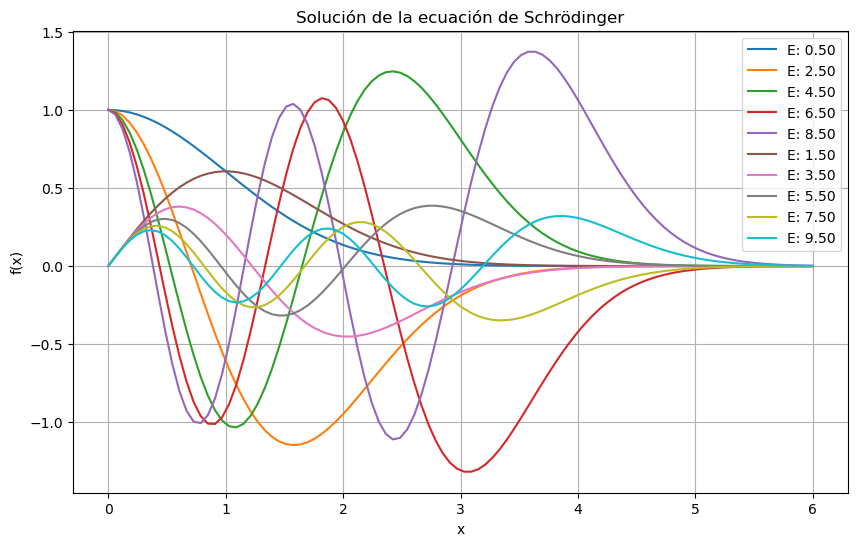

In [10]:
def schrodinger(x, y, E):
    f, df= y
    ddf_ddx = x**2 * f - 2 * E * f
    return [df, ddf_ddx]

x_span = (0, 6)
xs = np.linspace(x_span[0],x_span[1],100)
E = np.arange(0.1,10.,0.01)
y_i_sim=[1,0]
y_i_antisim=[0,1]
sols=[]
E_sim = []
E_antisim=[]

from tqdm.notebook import tqdm

for i in tqdm(E):
    sol = solve_ivp(fun=schrodinger, y0=y_i_sim, t_span=x_span, args=[i],method='RK45',t_eval=xs,max_step=0.01)
    if (np.sqrt(np.abs(sol.y[0,-1])**2+np.abs(sol.y[1,-1])**2) < 1):
        E_sim.append((i, sol.t, sol.y[0]))
for j in tqdm(E):
    sol = solve_ivp(fun=schrodinger, y0=y_i_antisim, t_span=x_span, args=[j],method='RK45',t_eval=xs,max_step=0.01)
    if (np.sqrt(np.abs(sol.y[0,-1])**2+np.abs(sol.y[1,-1])**2) < 1):
        E_antisim.append((j, sol.t, sol.y[0]))

sols= list((E_sim + E_antisim))

plt.figure(figsize=(10, 6))
for E, x, f in sols:
    plt.plot(x, f, label=f'E: {E:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Solución de la ecuación de Schrödinger')
plt.grid(True)
plt.legend()
plt.show()

Las primeras 5 energías indicadas corresponden a la forma simétrica y las demás a la froma antisimétrica